In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('clean.parquet')

### One-Hot Encoding for Categorical Values

In [3]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True) 
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [4]:
df = one_hot_encode(df, 'Marital_Status')

### Ordinal Encoding for Education Status

In [5]:
ranking_order = {'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD': 5}
df['Education'] = df['Education'].map(ranking_order)

### Calculate Entropy for all features

In [6]:
# def entropy(labels):
#     """Compute entropy given a list of labels."""
#     _, counts = np.unique(labels, return_counts=True)
#     probabilities = counts / len(labels)
#     return -np.sum(probabilities * np.log2(probabilities))

In [7]:
# # Compute entropy for each feature in df
# feature_entropies = {}
# for column in df.columns:
#     if column != 'Response':  # Exclude the output column
#         feature_entropy = entropy(df[column])
#         feature_entropies[column] = feature_entropy

In [8]:
# print(df.shape)
# df['Education'].value_counts()

In [9]:
# print(feature_entropies)

### Splitting Output from Input Space

In [10]:
X = df.drop('Response', axis= 1) 
y = df['Response']

### Splitting Training and Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Modelling

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [13]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

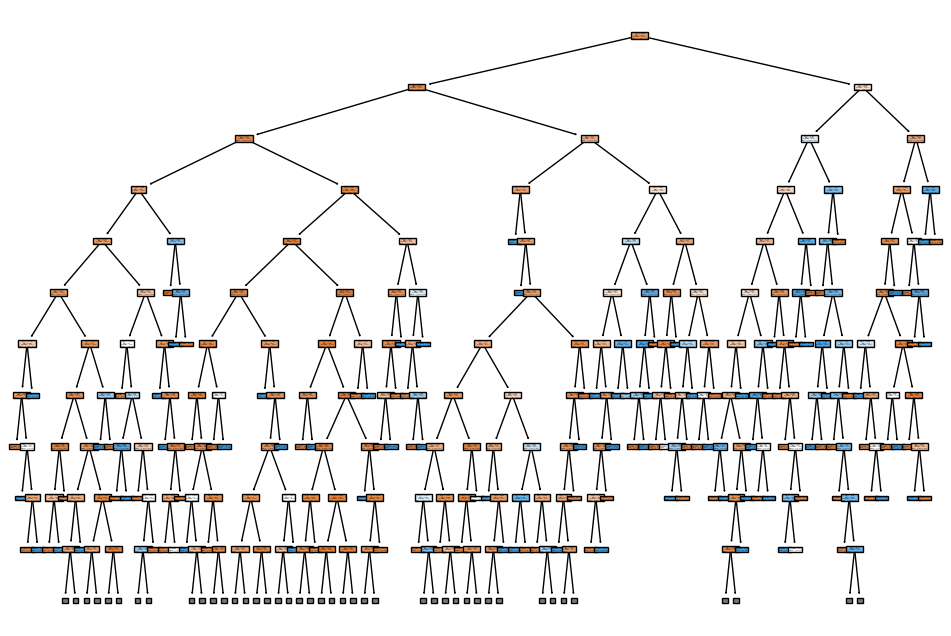

In [14]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, impurity=True, proportion=True, max_depth=10)
plt.show()

In [15]:
y_preds = clf.predict(X_test)

### Evaluation

In [16]:
acc = accuracy_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
cm = confusion_matrix(y_preds, y_test, labels=[1,0])
print(cm)

[[ 29  69]
 [ 35 312]]


In [17]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7663
Precision: 0.2959
Recall: 0.4531
F1: 0.3580
AUC: 0.6360
